# **Анализ поведения пользователей мобильного приложения**

## План исследования

1. **Обзор и предобработка данных**
   - Загрузка данных.
   - Проверка пропусков и дубликатов.
   - Преобразование типов данных.

2. **Анализ данных, воронка событий**
   - Определение этапов совершения покупок.
   - Расчет конверсии на каждом этапе.

3. **Изучение результатов A/A/B-теста**
   - Анализ влияния изменения шрифта на поведение пользователей.

4. **Общие выводы**
   - Рекомендации для менеджмента компании. 

**Описание проекта**

**Контекст**

Вы — аналитик крупного интернет-магазина. Вместе с отделом маркетинга вы подготовили список гипотез для увеличения выручки.
Приоритизируйте гипотезы, запустите A/B-тест и проанализируйте результаты. 

**Описание данных**

**Данные для первой части**
Файл `/datasets/hypothesis.csv.`
- `Hypothesis` — краткое описание гипотезы;
- `Reach` — охват пользователей по 10-балльной шкале;
- `Impact` — влияние на пользователей по 10-балльной шкале;
- `Confidence` — уверенность в гипотезе по 10-балльной шкале;
- `Efforts` — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

**Данные для второй части**
Файл `/datasets/orders.csv.`
- `transactionId` — идентификатор заказа;
- `visitorId` — идентификатор пользователя, совершившего заказ;
- `date` — дата, когда был совершён заказ;
- `revenue` — выручка заказа;
- `group` — группа A/B-теста, в которую попал заказ.

**Файл `/datasets/visitors.csv.`**
- `date` — дата;
- `group` — группа A/B-теста;
- `visitors` — количество пользователей в указанную дату в указанной группе A/B-теста

In [1]:
# Загружаем необходимые библиотеки

import pandas as pd  # Импорт библиотеки pandas для работы с таблицами данных (DataFrame)
from scipy import stats  # Импорт статистических функций из библиотеки scipy
import numpy as np  # Импорт библиотеки numpy для работы с многомерными массивами и математическими операциями
import math as mth  # Импорт стандартной библиотеки math для математических функций, с переименованием на 'mth' для удобства
import numpy as np  # Повторный импорт библиотеки numpy, избыточен, можно удалить
import matplotlib.pyplot as plt  # Импорт библиотеки matplotlib для построения графиков и визуализаций
import datetime as dt  # Импорт библиотеки datetime для работы с датами и временем

**Часть 1. Приоритизация гипотез.**

В файле `/datasets/hypothesis.csv` 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами `Reach`, `Impact`, `Confidence`, `Effort`.

**Задача**

- Примените фреймворк `ICE` для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
- Примените фреймворк `RICE` для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
- Укажите, как изменилась приоритизация гипотез при применении `RICE` вместо `ICE`. Объясните, почему так произошло.


1. Примените фреймворк `ICE` для приоритизации гипотез. Отсортируйте их по убыванию приоритета.

In [2]:
url = 'https://code.s3.yandex.net/datasets/hypothesis.csv'

df = pd.read_csv(url)  # Чтение данных из CSV-файла и сохранение их в переменную df (DataFrame)
pd.options.display.max_colwidth = 1  # Устанавливаем максимальную длину отображаемых ячеек таблицы (по умолчанию больше)
df  # Выводим DataFrame для предварительного просмотра данных

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [3]:
df['ICE'] = round(df['Impact'] * df['Confidence'] / df['Efforts'], 3)  # Расчёт приоритета гипотез по формуле ICE: (Impact * Confidence) / Efforts, округляем до 3 знаков после запятой
pd.options.display.max_colwidth = 1  # Устанавливаем максимальную длину отображаемых ячеек таблицы (по умолчанию больше)
df.sort_values(by='ICE', ascending=False)  # Сортируем DataFrame по столбцу 'ICE' по убыванию, чтобы показать гипотезы с наивысшим приоритетом

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.200
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.200
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.125
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.000


**Вывод.** 

При использовании метода приоритезации `ICE` ((от англ. impact, confidence, effort / ease «влияние, уверенность, усилия / простота») — один из самых популярных способов приоритизации задач), топ-3 гипотехы занимают гипотезы индексом 8, 0 и 7 

2. Примените фреймворк `RICE` для приоритизации гипотез. Отсортируйте их по убыванию приоритета.

In [4]:
df['RICE'] = df['Reach'] * df['Impact'] * df['Confidence'] / df['Efforts']  # Вычисление приоритета гипотезы по формуле RICE: (Reach * Impact * Confidence) / Efforts
pd.options.display.max_colwidth = 1  # Установка максимальной длины отображаемых ячеек таблицы в 1 символ для улучшения восприятия данных.
df.sort_values(by='RICE', ascending=False)  # Сортировка гипотез по столбцу 'RICE' в порядке убывания, чтобы на верхушке оказались гипотезы с наивысшим приоритетом.

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.200,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.000,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.333,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.000,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.200,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.125,9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.000,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.333,4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.000,3.0


**Вывод.** 

При использовании метода приоритезации `RICE` (R от англ. reach, «охват»), приоритет меняется и топ-3 гипотезы становятся гипотезы с индексом 7, 2 и 0

3. Укажите, как изменилась приоритизация гипотез при применении `RICE` вместо `ICE`. Объясните, почему так произошло.

**Вывод.** 

При `ICE` в первую тройку входили гипотезы индексом 8(16.2 баллов), 0(13.3 баллов) и 7(11.2 баллов). Но применение метода `RICE` все изменило и теперь в первую тройку входит 7(), 2() и 0(). Приоретизация поменялась потому как, метод `RICE` привлекает значение охвата, тем самым меняет приоритет гипотез. Пример: гипотеза индесом 8 при оценке `ICE` было 16.2 баллов, но охватывает только 1 пользователя/участок/и тд, но у гипотезы 7 - 11.2 баллов, но охватывает 10 ед. 

**Часть 2. Анализ A/B-теста**
Вы провели A/B-тест и получили результаты, которые описаны в файлах `/datasets/orders.csv` и `/datasets/visitors.csv.`

**Задача**

Проанализируйте A/B-тест:

1. Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.
2. Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.
3. Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.
4. Постройте график кумулятивного среднего количества заказов на посетителя по группам. Сделайте выводы и предположения.
5. Постройте график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Сделайте выводы и предположения.
6. Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.
7. Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.
8. Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.
9. Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.
10. Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Сделайте выводы и предположения.
11. Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.
12. Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Сделайте выводы и предположения.
13. Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.
14. Примите решение по результатам теста и объясните его. Варианты решений:
- Остановить тест, зафиксировать победу одной из групп.
- Остановить тест, зафиксировать отсутствие различий между группами.
- Продолжить тест.

1. Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.

In [5]:
url_orders = 'https://code.s3.yandex.net/datasets/orders.csv'
url_visitors = 'https://code.s3.yandex.net/datasets/visitors.csv'

orders = pd.read_csv(url_orders)  # Чтение данных о заказах из файла CSV и сохранение их в DataFrame 'orders'
orders['date'] = pd.to_datetime(orders['date'])  # Преобразование столбца 'date' в формат даты/времени для удобства анализа
orders.info()  # Вывод информации о DataFrame orders, включая количество записей и типы данных

visitors = pd.read_csv(url_visitors)  # Чтение данных о посетителях из файла CSV и сохранение их в DataFrame 'visitors'
visitors['date'] = pd.to_datetime(visitors['date'])  # Преобразование столбца 'date' в формат даты/времени для удобства анализа
orders.info()  # Вывод информации о DataFrame orders (повторно для информации о заказах)

print(orders.head(5))  # Вывод первых 5 строк данных о заказах для предварительного анализа
print(visitors.head(5))  # Вывод первых 5 строк данных о посетителях для предварительного анализа

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   int64         
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   int64         
 4   group          1197 non-null   object        
dtyp

In [6]:
# Выделяем пользователей, которые сделали заказы в группе A
orders_A = orders[orders['group'] == 'A']['visitorId']  
# Выделяем пользователей, которые сделали заказы в группе B
orders_B = orders[orders['group'] == 'B']['visitorId']

# Находим общих посетителей, которые есть и в группе A, и в группе B
common_visitors = orders_A[orders_A.isin(orders_B)] 

# Выводим список общих посетителей
display(common_visitors) 

# Убираем заказы от общих посетителей из данных о заказах, так как они могут исказить результаты теста
orders = orders[~orders['visitorId'].isin(common_visitors)]  

# Выводим очищенную таблицу заказов, исключив общих посетителей
display(orders) 

2       4069496402
26      199603092 
29      3803269165
33      2378935119
41      237748145 
          ...     
1167    4186807279
1173    2712142231
1178    2949041841
1183    963407295 
1195    1614305549
Name: visitorId, Length: 89, dtype: int64

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B
...,...,...,...,...,...
1191,3592955527,608641596,2019-08-14,16490,B
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A


**Вывод.**

Загрузил все данный и посмотрел. Увидел общую информацию о таблицах. При изучении, обнаружил, что 89 ед пользователей входили в группу А и В одновременно. Этих пользователей удалил.

        date group  orders  buyers  revenue  visitors
0 2019-08-01  A     23      19      142779   719     
1 2019-08-01  B     17      17      59758    713     
2 2019-08-02  A     42      36      234381   1338    
3 2019-08-02  B     40      39      221801   1294    
4 2019-08-03  A     66      60      346854   1845    


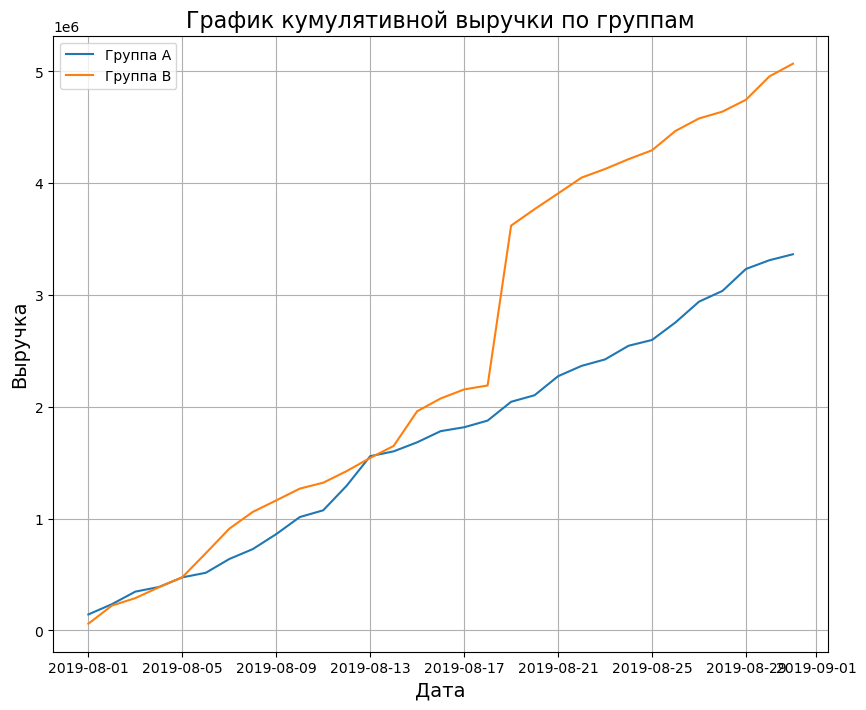

In [7]:
# Создаём DataFrame с уникальными датами и группами для дальнейшей агрегации
datesGroups = orders[['date', 'group']].drop_duplicates()

# Применяем агрегацию для подсчёта кумулятивных данных о заказах по дате и группе
ordersAggregated = datesGroups.apply(
    lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({
        'date': 'max',  # Берём максимальную дату
        'group': 'max',  # Группа остаётся постоянной
        'transactionId': pd.Series.nunique,  # Подсчёт уникальных транзакций
        'visitorId': pd.Series.nunique,  # Подсчёт уникальных посетителей
        'revenue': 'sum'  # Суммирование выручки
    }), axis=1).sort_values(by=['date', 'group'])  # Сортировка по дате и группе

# Применяем агрегацию для подсчёта кумулятивных данных о посетителях по дате и группе
visitorsAggregated = datesGroups.apply(
    lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({
        'date': 'max',  # Берём максимальную дату
        'group': 'max',  # Группа остаётся постоянной
        'visitors': 'sum'  # Суммирование количества посетителей
    }), axis=1).sort_values(by=['date', 'group'])  # Сортировка по дате и группе

# Объединяем данные о заказах и посетителях для расчёта кумулятивных метрик
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']  # Переименовываем колонки для удобства

# Выводим первые строки кумулятивных данных для проверки
print(cumulativeData.head())

# Отбираем данные для группы A
cumulativeRevenueA = cumulativeData[cumulativeData['group'] == 'A'][['date', 'revenue', 'orders']] 

# Отбираем данные для группы B
cumulativeRevenueB = cumulativeData[cumulativeData['group'] == 'B'][['date', 'revenue', 'orders']] 

# Строим график
plt.figure(figsize=(10, 8))  # Устанавливаем размер графика
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='Группа A')  # График для группы A

plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='Группа B')  # График для группы B

# Настройка заголовка и подписей
plt.title('График кумулятивной выручки по группам', fontsize=16)
plt.xlabel('Дата', fontsize=14)
plt.ylabel('Выручка', fontsize=14)

plt.grid(True)  # Включаем сетку для лучшей видимости графика

plt.legend()  # Добавляем легенду для различения групп

# Показываем график
plt.show()  # Отображаем график

**Вывод.**

График кумулятивных данных о доходах по датам. Выручка почти равномерно увеличивается в течение всего теста. 
Однако графики выручки в группе В в 2019-08-19 резко растет. Это может сигнализировать о всплесках числа заказов, либо о появлении очень дорогих заказов в выборке. Возможно это аномалия. Необходимо проверить.

2. Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.

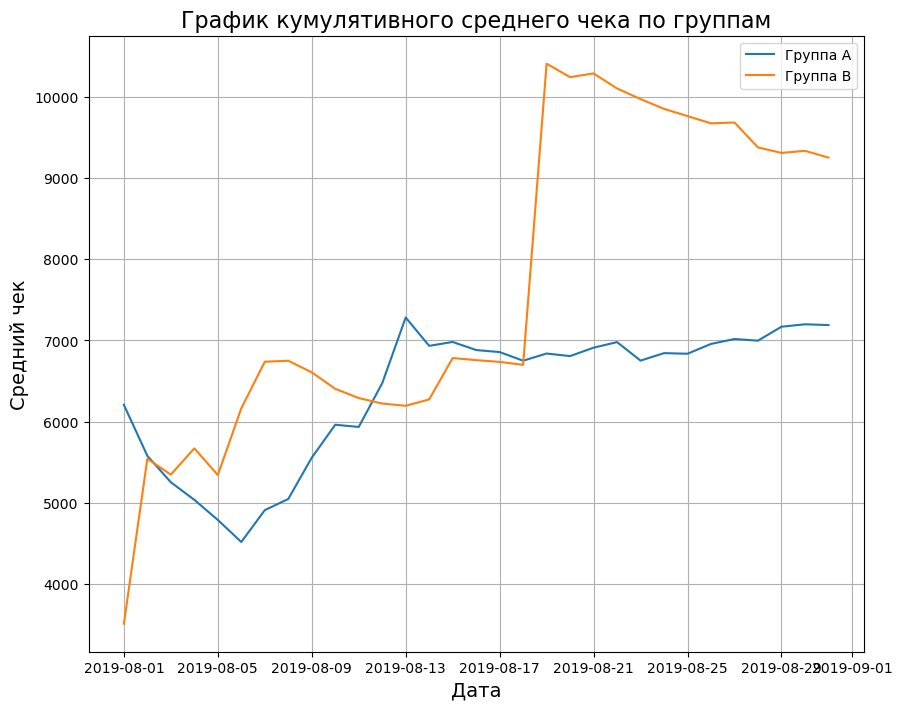

In [8]:
plt.figure(figsize=(10, 8))  # Устанавливаем размер графика (ширина: 10, высота: 8)

# Настройка заголовка и подписей для графика
plt.title('График кумулятивного среднего чека по группам', fontsize=16)  # Заголовок графика
plt.xlabel('Дата', fontsize=14)  # Подпись оси X (Дата)
plt.ylabel('Средний чек', fontsize=14)  # Подпись оси Y (Средний чек)

# Строим график для группы A: делим кумулятивную выручку на количество заказов
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'] / cumulativeRevenueA['orders'], label='Группа A')

# Строим график для группы B: делим кумулятивную выручку на количество заказов
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'] / cumulativeRevenueB['orders'], label='Группа B')

plt.grid(True)  # Включаем сетку для улучшения восприятия графика
plt.legend()  # Добавляем легенду, чтобы различать группы

# Показываем график
plt.show()  # Отображаем график

**Вывод.**

Средний чек тоже становится равномерным ближе к концу теста: установился для группы A и продолжает падать для группы B. Вначале в группе А наблюдается плавное снижение и местами резкое повышение. А в группу B в половине теста (2019-08-19), возможно, попали крупные заказы (резкий всплеск на графике). Тогда ей нужно больше данных, чтобы прийти к реальному среднему чеку и установиться на его уровне.

3. Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.

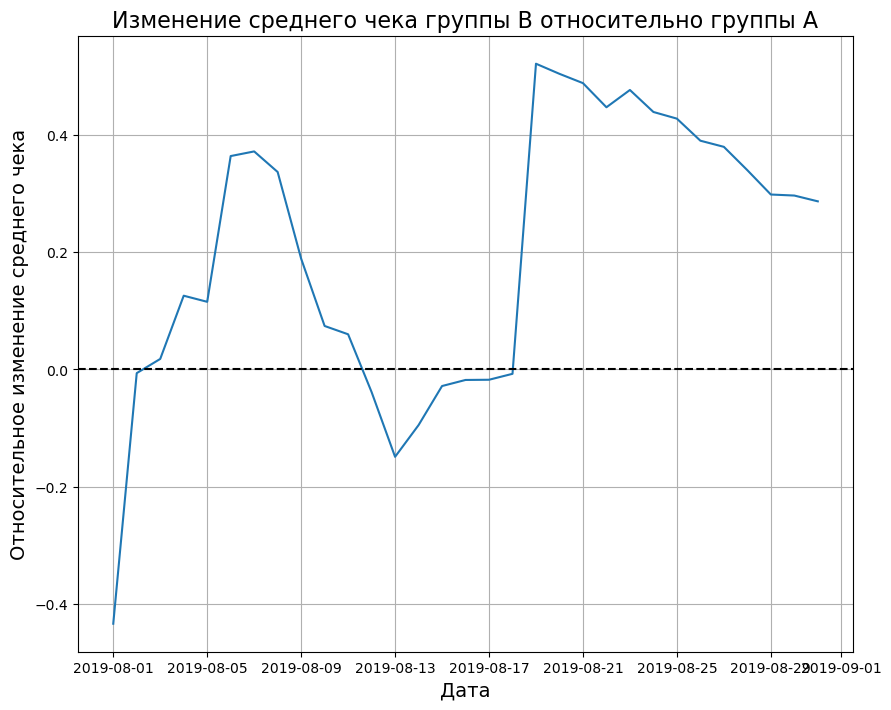

In [9]:
# Объединяем кумулятивные данные по выручке для группы A и группы B на основе даты
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# Создаём график изменения среднего чека группы B относительно группы A

plt.figure(figsize=(10, 8))  # Устанавливаем размер графика (ширина: 10, высота: 8)
plt.grid(True)  # Включаем сетку для улучшения восприятия графика

plt.xlabel('Дата', fontsize=14)  # Подпись оси X (Дата)
plt.ylabel('Относительное изменение среднего чека', fontsize=14)  # Подпись оси Y (Относительное изменение среднего чека)

# Строим график: (средний чек группы B / средний чек группы A) - 1
# Это выражение показывает, насколько средний чек группы B отличается от среднего чека группы A
plt.plot(mergedCumulativeRevenue['date'], 
    (mergedCumulativeRevenue['revenueB'] / mergedCumulativeRevenue['ordersB']) / (mergedCumulativeRevenue['revenueA'] / mergedCumulativeRevenue['ordersA']) - 1)

plt.title('Изменение среднего чека группы B относительно группы A', fontsize=16)  # Заголовок графика

plt.axhline(y=0, color='black', linestyle='--')  # Добавляем горизонтальную линию на уровне 0 для удобства интерпретации

**Вывод.**

В нескольких точках график различия между сегментами резко скачет вниз и верх. Теперь мы можем сказать, что имеются резкие выбросы (аномалии).

4. Постройте график кумулятивного среднего количества заказов на посетителя по группам. Сделайте выводы и предположения.

(18109.0, 18140.0, 0.0, 0.05)

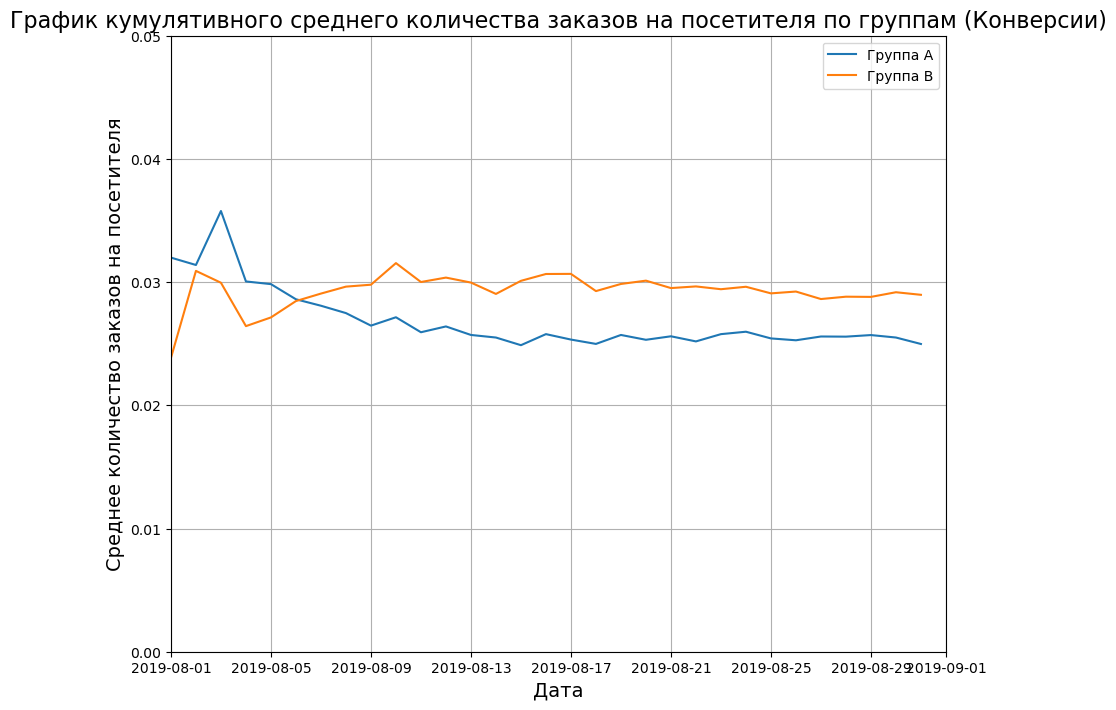

In [10]:
# Рассчитываем кумулятивное среднее количество заказов на посетителя (конверсия)
cumulativeData['conversion'] = cumulativeData['orders'] / cumulativeData['visitors']

# Отделяем данные для группы A
cumulativeDataA = cumulativeData[cumulativeData['group'] == 'A']

# Отделяем данные для группы B
cumulativeDataB = cumulativeData[cumulativeData['group'] == 'B']

# Строим график
plt.figure(figsize=(10, 8))  # Устанавливаем размер графика (ширина: 10, высота: 8)
plt.grid(True)  # Включаем сетку для улучшения восприятия графика

# Заголовок и подписи осей
plt.title('График кумулятивного среднего количества заказов на посетителя по группам (Конверсии)', fontsize=16)
plt.xlabel('Дата', fontsize=14)  # Подпись оси X (Дата)
plt.ylabel('Среднее количество заказов на посетителя', fontsize=14)  # Подпись оси Y (Конверсия)

# Строим графики для обеих групп
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='Группа A')  # График для группы A
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='Группа B')  # График для группы B

plt.legend()  # Добавляем легенду для различия групп

# Задаём масштаб осей (от 1 августа до 1 сентября 2019 года, и ограничиваем ось Y от 0 до 0.05)
plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 9, 1), 0, 0.05])  # Обрезаем график по времени и ограничиваем ось Y

**Вывод.**

Поначалу конверсии колебались, но потом усреднились. Группа А постепенно с течением времени наблюдались снижение. Группа В, стабильно в области 0.03

5. Постройте график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Сделайте выводы и предположения.

(18109.0, 18140.0, -0.5, 0.5)

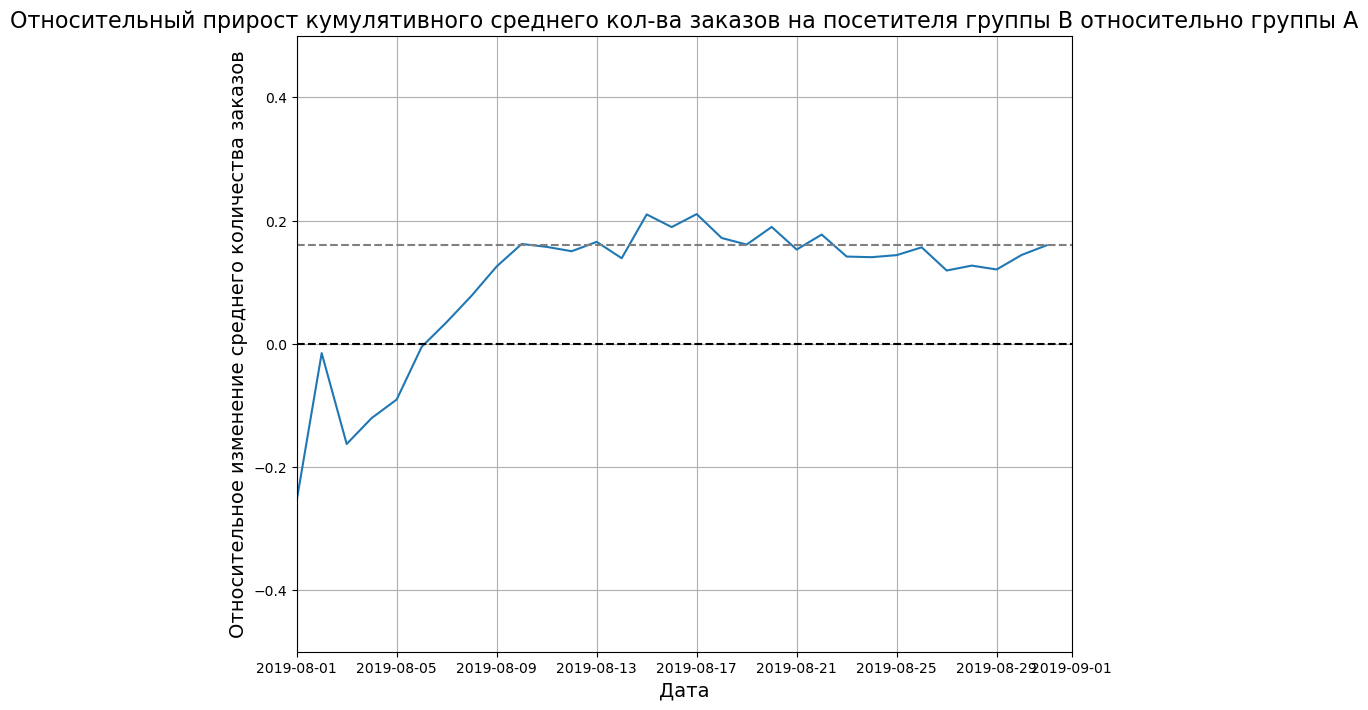

In [11]:
# Объединяем данные о конверсии для группы A и группы B на основе даты
mergedCumulativeConversions = cumulativeDataA[['date', 'conversion']].merge(
    cumulativeDataB[['date', 'conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# Строим график относительного изменения кумулятивного среднего количества заказов на посетителя группы B по отношению к группе A

plt.figure(figsize=(10, 8))  # Устанавливаем размер графика (ширина: 10, высота: 8)
plt.grid(True)  # Включаем сетку для улучшения восприятия графика

plt.xlabel('Дата', fontsize=14)  # Подпись оси X (Дата)
plt.ylabel('Относительное изменение среднего количества заказов', fontsize=14)  # Подпись оси Y (Изменение конверсии)

plt.title('Относительный прирост кумулятивного среднего кол-ва заказов на посетителя группы B относительно группы A', fontsize=16)  # Заголовок графика

# Строим график относительного изменения: (конверсия B / конверсия A) - 1
# Это выражение показывает, насколько конверсия группы B отличается от конверсии группы A
plt.plot(mergedCumulativeConversions['date'], 
         mergedCumulativeConversions['conversionB'] / mergedCumulativeConversions['conversionA'] - 1)

plt.axhline(y=0, color='black', linestyle='--')  # Добавляем горизонтальную линию на уровне 0 для отслеживания изменений
plt.axhline(y=0.16, color='grey', linestyle='--')  # Добавляем горизонтальную линию на уровне 0.16 для дополнительной визуализации

# Задаём масштаб осей (от 1 августа до 1 сентября 2019 года, и ограничиваем ось Y от -0.5 до 0.5)
plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 9, 1), -0.5, 0.5])  # Обрезаем график по времени и задаём ограничения на ось Y

**Вывод.**

В начале теста группа B значительно проигрывала группе A, затем вырвалась вперёд. Потом среднее количество заказов на посетителя для группы B снова уменьшалось, но теперь постепенно растёт
В целом отношение среднего количества заказов на посетителя ещё не установилось, и сейчас делать какие-либо выводы по тесту нельзя. Впрочем, сперва стоит проанализировать аномалии, возможно, они изменят картину.

6. Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.

         userId  orders
908  3967698036  3     
55   249864742   3     
478  2108163459  3     
687  2988190573  3     
890  3908431265  3     
138  611059232   3     
632  2742574263  3     
157  678354126   2     
323  1404560065  2     
452  1985475298  2     


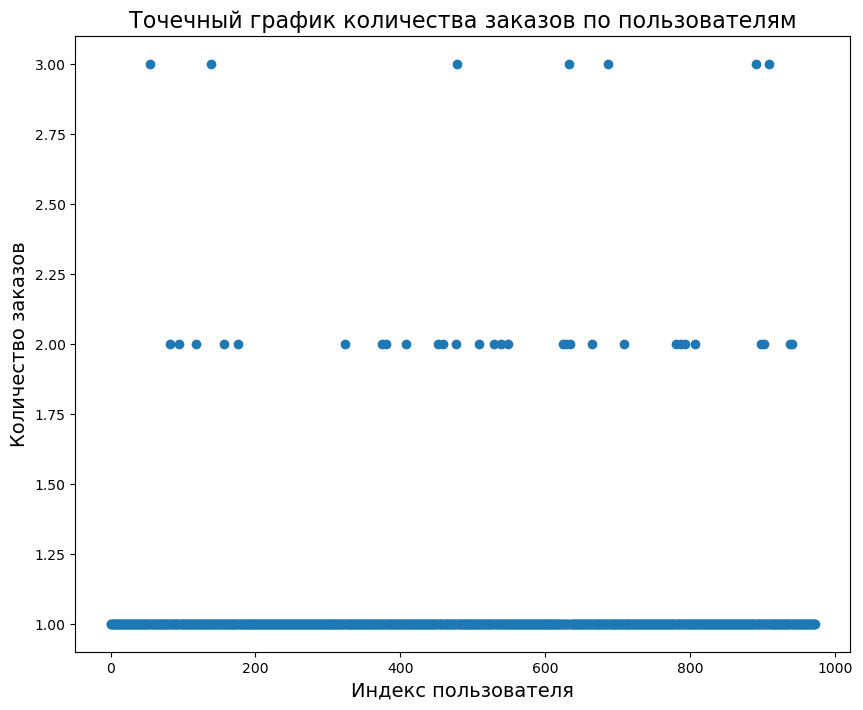

In [12]:
# Группируем данные по пользователям и считаем количество уникальных заказов (transactionId) для каждого пользователя
ordersByUsers = orders.groupby('visitorId').agg({'transactionId': 'nunique'}).reset_index()

# Переименовываем столбцы для удобства
ordersByUsers.columns = ['userId', 'orders']

# Выводим 10 пользователей с наибольшим количеством заказов
print(ordersByUsers.sort_values(by='orders', ascending=False).head(10))

# Создаём график
plt.figure(figsize=(10, 8))  # Устанавливаем размер графика (ширина: 10, высота: 8)

# Заголовок и подписи осей
plt.title('Точечный график количества заказов по пользователям', fontsize=16)
plt.xlabel('Индекс пользователя', fontsize=14)  # Подпись оси X (Индекс пользователя)
plt.ylabel('Количество заказов', fontsize=14)  # Подпись оси Y (Количество заказов)

# Строим точечный график, где по оси X будет индекс пользователя, а по оси Y — количество заказов
x_values = pd.Series(range(0, len(ordersByUsers)))  # Создаём список индексов пользователей
plt.scatter(x_values, ordersByUsers['orders'])  # Отображаем точки

**Вывод.**

По графику видно, что большинство покупателей заказывали 1-2 раза. Лишь малые сделали 3 покупки. Но абсолютную долю не могу назвать. Для этого посчитаем перцентили.

7. Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.

In [13]:
# Считаем 95-й и 99-й перцентили количества заказов на пользователя
print(np.percentile(ordersByUsers['orders'], [95, 99]))

[1. 2.]


**Вывод.**

Не более 5% пользователей оформляли больше чем 1 заказа. Разумно выбрать 2 заказов на одного пользователя за верхнюю границу числа заказов, и отсеять аномальных пользователей по ней. Удалением таких строк займёмся в следующем уроке.

8. Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.

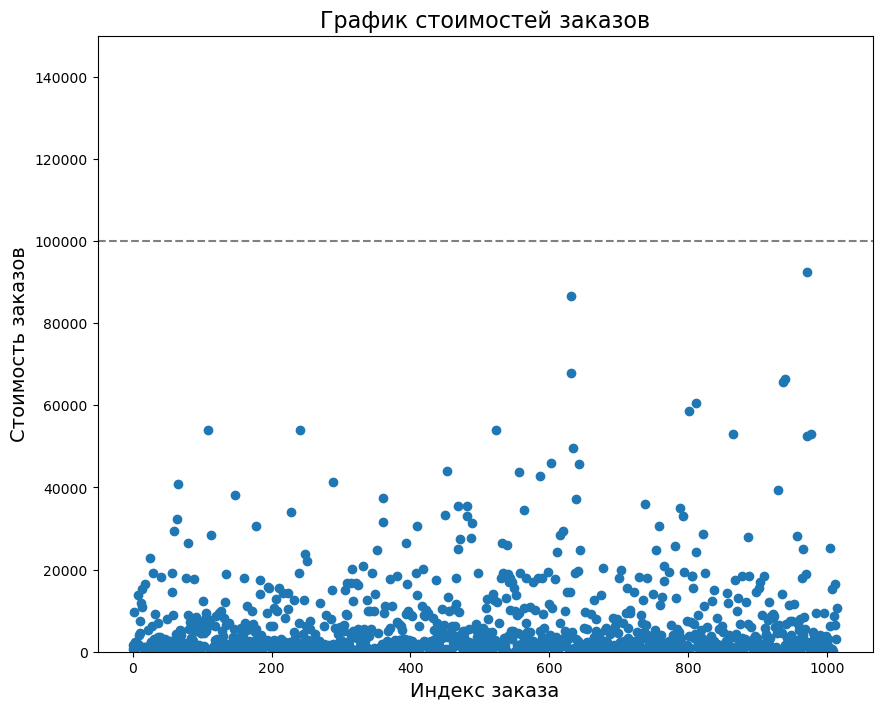

In [14]:
# Строим график стоимостей заказов
plt.figure(figsize=(10, 8))  # Устанавливаем размер графика (ширина: 10, высота: 8)

# Заголовок и подписи осей
plt.title('График стоимостей заказов', fontsize=16)
plt.xlabel('Индекс заказа', fontsize=14)  # Подпись оси X (Индекс заказа)
plt.ylabel('Стоимость заказов', fontsize=14)  # Подпись оси Y (Стоимость заказов)

# Ограничиваем ось Y для улучшения визуализации (от 0 до 150000)
plt.ylim([0, 150000])

# Добавляем горизонтальную линию на уровне 100000 для отслеживания крупных заказов
plt.axhline(y=100000, color='grey', linestyle='--')

# Создаём список индексов заказов (от 0 до количества заказов)
x_values = pd.Series(range(0, len(orders['revenue'])))

# Строим точечный график для стоимости заказов (по оси X — индекс заказа, по оси Y — стоимость)
plt.scatter(x_values, orders['revenue'])  


**Вывод.**

Есть немного дорогих заказов. По графику можно выбрать границу аномальных заказов выше 30.000 у.е. Однако принято отсеивать от 1% до 5% наблюдений с крайними значениями. 

9. Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.

In [15]:
# Считаем 95-й и 99-й перцентили стоимостей заказов
print(np.percentile(orders['revenue'], [95, 99]))  

[26785. 53904.]


**Вывод.**

После того, как воспользовался перцентилями, увидел, что только 5 % заказов были совершены выше 26785 у.е. Таким образом, верхним порогом можно назначить 30 000 у.е.

10. Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Сделайте выводы и предположения.

**Сформулируем гипотезы.**

*Нулевая Н0:* различий в среднем количестве заказов между группами нет. 

*Альтернативная Н1:* различия в среднем между группами есть.

Используем статистический тест - **непараметрический тест Уилкоксона-Манна-Уитни**, так как у меня в таблице данных имеются приличные выбросы

**Уровень статистической значимости** принимаем за 0.05

In [16]:
# Загружаем и показываем первые строки данных orders и visitors для понимания их структуры.
display(orders.head())  
display(visitors.head())

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


Подготовим данных чтобы посчитать статистическую значимость различий в среднем количестве заказов на посетителя между группами

In [17]:
# Подготовим данные для подсчета статистической значимости различий в среднем количестве заказов на посетителя

# Для группы A находим количество посетителей по дням
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

# Для группы A создаем кумулятивное количество посетителей
visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

# Для группы B аналогично находим количество посетителей по дням
visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

# Для группы B создаем кумулятивное количество посетителей
visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

# Для группы A считаем количество заказов по дням
ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

# Для группы A создаем кумулятивное количество заказов
ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

# Для группы B считаем количество заказов по дням
ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

# Для группы B создаем кумулятивное количество заказов
ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

# Объединяем все данные по группам в один датафрейм
data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

# Показываем первые 5 строк объединенных данных
display(data.head(5))

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,23,142779,17,59758,23,142779,17,59758,719,713,719,713
1,2019-08-02,19,91602,23,162043,42,234381,40,221801,619,581,1338,1294
2,2019-08-03,24,112473,14,67049,66,346854,54,288850,507,509,1845,1803
3,2019-08-04,11,41176,14,96890,77,388030,68,385740,717,770,2562,2573
4,2019-08-05,22,86383,21,89908,99,474413,89,475648,756,707,3318,3280


Напомним:

- `date` — дата;
- `ordersPerDateA` — количество заказов в выбранную дату в группе A;
- `revenuePerDateA` — суммарная выручка в выбранную дату в группе A;
- `ordersPerDateB` — количество заказов в выбранную дату в группе B;
- `revenuePerDateB` — суммарная выручка в выбранную дату в группе B;
- `ordersCummulativeA` — суммарное число заказов до выбранной даты включительно в группе A;
- `revenueCummulativeA` — суммарная выручка до выбранной даты включительно в группе A;
- `ordersCummulativeB` — суммарное количество заказов до выбранной даты включительно в группе B;
- `revenueCummulativeB` — суммарная выручка до выбранной даты включительно в группе B;
- `visitorsPerDateA` — количество пользователей в выбранную дату в группе A;
- `visitorsPerDateB` — количество пользователей в выбранную дату в группе B;
- `visitorsCummulativeA` — количество пользователей до выбранной даты включительно в группе A;
- `visitorsCummulativeB` — количество пользователей до выбранной даты включительно в группе B.

In [18]:
# Для группы A: группировка по пользователям (visitorId) и подсчет уникальных заказов (transactionId)
ordersByUsersA = (
    orders[orders['group'] == 'A']  # Фильтруем данные только для группы A
    .groupby('visitorId', as_index=False)  # Группируем по ID пользователей (visitorId)
    .agg({'transactionId': pd.Series.nunique})  # Для каждого пользователя считаем количество уникальных заказов
)
ordersByUsersA.columns = ['userId', 'orders']  # Переименовываем колонки

# Для группы B: аналогичная операция для группы B
ordersByUsersB = (
    orders[orders['group'] == 'B']  # Фильтруем данные только для группы B
    .groupby('visitorId', as_index=False)  # Группируем по ID пользователей (visitorId)
    .agg({'transactionId': pd.Series.nunique})  # Для каждого пользователя считаем количество уникальных заказов
)
ordersByUsersB.columns = ['userId', 'orders']  # Переименовываем колонки

# Для каждой группы формируем выборки, добавляя нулевые значения для пользователей без заказов
# Для группы A: создаем выборку, добавляем нули для пользователей, у которых нет заказов
sampleA = pd.concat([ordersByUsersA['orders'], pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() 
                                                    - len(ordersByUsersA['orders'])), name='orders')], axis=0)

# Для группы B: аналогично для группы B
sampleB = pd.concat([ordersByUsersB['orders'], pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() 
                                                    - len(ordersByUsersB['orders'])), name='orders')], axis=0)

# Вычисляем p-value с помощью непараметрического теста Уилкоксона-Манна-Уитни
# p-value позволяет понять, есть ли статистически значимые различия между группами
print('p-value: ' "{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

# Вычисляем относительный прирост среднего числа заказов в группе B относительно группы A
# Относительный прирост показывается как (среднее группы B / среднее группы A - 1)
# Это значение помогает понять, насколько группа B отличается от группы A по числу заказов
print('Относительный прирост среднего числа заказов группы B: ' "{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

p-value: 0.011
Относительный прирост среднего числа заказов группы B: 0.160


**Вывод.**

По «сырым» данным различий в среднем числе заказов групп A и B есть. 

Первое число — p-value = 0.011 меньше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в среднем числе заказов между группами нет, отвергаем в пользу альтернативной гиротезе.
При этом относительный выигрышь группы B равен 16% — второе число в выводе.

11. Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.

**Сформулируем гипотезы.**

*Нулевая гипотеза:* различий в среднем чеке между группами нет. 

*Альтернативная гипотеза:* различия в среднем чеке между группами есть. 

**Уровень статистической значимости** принимаем за 0.05

In [19]:
# Статистическая значимость различий в среднем чеке между группами A и B
# Мы используем непараметрический тест Уилкоксона-Манна-Уитни для проверки различий в распределении стоимостей заказов между группами
# Это подходит, потому что данные могут содержать выбросы и не подчиняются нормальному распределению.

print('p-value: ', '{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'],  # Стоимости заказов для группы A
                                          orders[orders['group']=='B']['revenue'])[1]))  # Стоимости заказов для группы B
# Функция mannwhitneyu возвращает два значения: статистику теста и p-value.
# p-value показывает, есть ли статистически значимые различия между группами.
# Если p-value < 0.05, то мы отвергаем нулевую гипотезу и делаем вывод, что различия между группами есть.

# Относительный прирост среднего чека группы B относительно группы A.
# Этот показатель говорит, насколько средний чек группы B больше или меньше среднего чека группы A.
print('Относительный прирост среднего чека заказа группы B: ', 
      '{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))
# Формула для вычисления относительного прироста: (среднее значение группы B / среднее значение группы A) - 1.
# Если результат положительный, это значит, что средний чек группы B выше, если отрицательный — то ниже.

p-value:  0.829
Относительный прирост среднего чека заказа группы B:  0.287


**Вывод.**

P-value значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. Впрочем, средний чек группы B значительно выше среднего чека группы A и составляет +28,7%.

12. Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Сделайте выводы и предположения.

In [20]:
# Определяем пользователей, которые сделали более 2-х заказов
# Для группы A фильтруем пользователей, которые совершили более 2 заказов
# Для группы B фильтруем пользователей, которые совершили более 2 заказов
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > 2]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] > 2]['userId'], ], axis=0,)

# Определяем пользователей, которые сделали заказы на сумму больше 30 000
# Эти пользователи могут быть выбросами, так как такие заказы, скорее всего, имеют аномальные значения.
usersWithExpensiveOrders = orders[orders['revenue'] > 30000]['visitorId']

# Объединяем пользователей с аномальными большими заказами и с большим количеством заказов
abnormalUsers = (pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0).drop_duplicates().sort_values())

# Выводим список пользователей с аномальными значениями (больше 2 заказов или стоимость заказа > 30 000)
display(abnormalUsers)
# Выводим количество аномальных пользователей
display(abnormalUsers.shape[0])

1099    148427295 
928     204675465 
33      249864742 
684     358944393 
648     382846391 
58      611059232 
751     689129267 
1137    759473111 
77      787824685 
654     816783716 
339     834731816 
949     887908475 
744     888512513 
563     935349363 
709     950626008 
1103    1164614297
1136    1307669133
421     1357170471
549     1367935136
562     1452540367
420     1606766439
425     1920142716
1196    2108080724
211     2108163459
570     2247666522
287     2254456485
131     2254586615
1006    2261934787
273     2278620397
755     2279926127
1142    2606908679
347     2742574263
527     2837914161
925     2840985286
890     2853587382
530     2912540959
173     2953427180
310     2988190573
208     3118156181
481     3177790019
78      3288820196
746     3321013705
867     3372131337
1087    3590655705
409     3908431265
613     3931967268
416     3967698036
940     4003628586
743     4133034833
dtype: int64

49

**Вывод.** 

Всего 49 аномальных пользователей

In [21]:
# Формируем выборку для группы A без аномальных пользователей.
# Для этого из таблицы ordersByUsersA удаляем пользователей из списка abnormalUsers (анномальных пользователей).
# Затем добавляем нулевые значения для пользователей, которые не совершили заказы (чтобы размер выборки соответствовал общему числу посетителей).
sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))]['orders'],
        pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders', ), ],
    axis=0,)

# Формируем выборку для группы B без аномальных пользователей по аналогии с группой A.
sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))]['orders'],
        pd.Series(0,index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders',),],
    axis=0,)

# Проводим непараметрический тест Манна-Уитни для проверки статистической значимости различий между выборками.
# Этот тест применяется, поскольку мы работаем с очищенными данными, исключив выбросы.
# Функция stats.mannwhitneyu возвращает p-value, которое мы используем для оценки статистической значимости.
print('Статистический критерий Манна-Уитни к полученным выборкам:', '{0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))

# Рассчитываем относительный прирост среднего количества заказов группы B по сравнению с группой A.
# Это показывается как (среднее значение группы B / среднее значение группы A) - 1.
print('Относительный прирост среднего числа заказов группы B: ', '{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

Статистический критерий Манна-Уитни к полученным выборкам: 0.010
Относительный прирост среднего числа заказов группы B:  0.187


**Вывод.**

Результаты по среднему количеству заказов практически не изменились. Относительный прирост увеличился на 2,7%

13. Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.

In [22]:
# Применяем фильтрацию для выборки из группы A и группы B, исключая аномальных пользователей.
# Для этого используем np.logical_and для фильтрации по группе и для исключения пользователей из списка abnormalUsers.

# Применяем тест Манна-Уитни для статистической значимости различий в среднем чеке между группами A и B.
# Для этого выбираем данные по выручке (revenue) для каждой группы, исключая аномальных пользователей.
print('Статистический критерий Манна-Уитни к полученным выборкам: ', 
      '{0:.3f}'.format(stats.mannwhitneyu(orders[np.logical_and(orders['group'] == 'A', 
    np.logical_not(orders['visitorId'].isin(abnormalUsers)),)]['revenue'], 
    orders[np.logical_and(orders['group'] == 'B', 
    np.logical_not(orders['visitorId'].isin(abnormalUsers)),)]['revenue'],)[1]))

# Рассчитываем относительный прирост среднего чека для группы B по сравнению с группой A, исключая аномальных пользователей.
# Это рассчитывается как (среднее значение выручки группы B / среднее значение выручки группы A) - 1.
print('Относительный прирост среднего чека заказа группы B: ',
"{0:.3f}".format(orders[np.logical_and(orders['group'] == 'B', np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )]['revenue'].mean()
        / orders[np.logical_and(orders['group'] == 'A', 
        np.logical_not(orders['visitorId'].isin(abnormalUsers)),)]['revenue'].mean() - 1)) 

Статистический критерий Манна-Уитни к полученным выборкам:  0.741
Относительный прирост среднего чека заказа группы B:  -0.027


**Вывод.**

Хоть после очистки P-value снизилось с 0.83 до 0.74, но все равно больше 0.05. При этом, относительный прирост сильно упал, было +28,7%, стало - 2,7%

14. Примите решение по результатам теста и объясните его. Варианты решений:
- Остановить тест, зафиксировать победу одной из групп.
- Остановить тест, зафиксировать отсутствие различий между группами.
- Продолжить тест.

(18109.0, 18140.0, -0.5, 0.5)

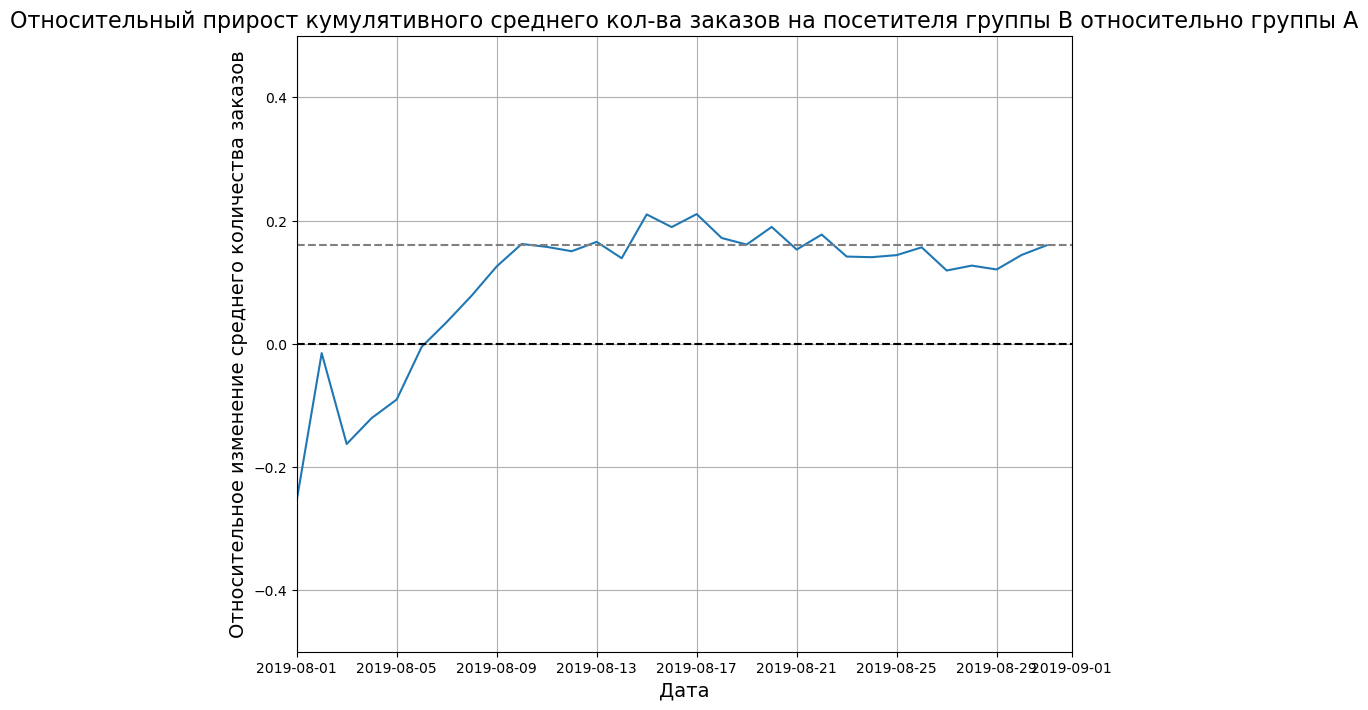

In [23]:
# Относительный прирост кумулятивного среднего количества заказов на посетителя группы B относительно группы A
plt.figure(figsize=(10, 8))
plt.grid(True)
plt.xlabel('Дата', fontsize=14)
plt.ylabel('Относительное изменение среднего количества заказов', fontsize=14)
plt.title('Относительный прирост кумулятивного среднего кол-ва заказов на посетителя группы B относительно группы A', fontsize=16)
plt.plot(mergedCumulativeConversions['date'], 
         mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1)

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.16, color='grey', linestyle='--')

plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 9, 1), -0.5, 0.5])

**Выводы из A/B-теста.**

- Есть статистически значимое различие по конверсии между группами как по сырым данным, так и после фильтрации аномалий.
- Нет статистически значимого различия по среднему чеку между группами как по сырым данным, так и после фильтрации аномалий.
- График различия конверсии между группами сообщает, что результаты группы B лучше группы A: имеют тенденцию к росту, либо зафиксировались около среднего значения.

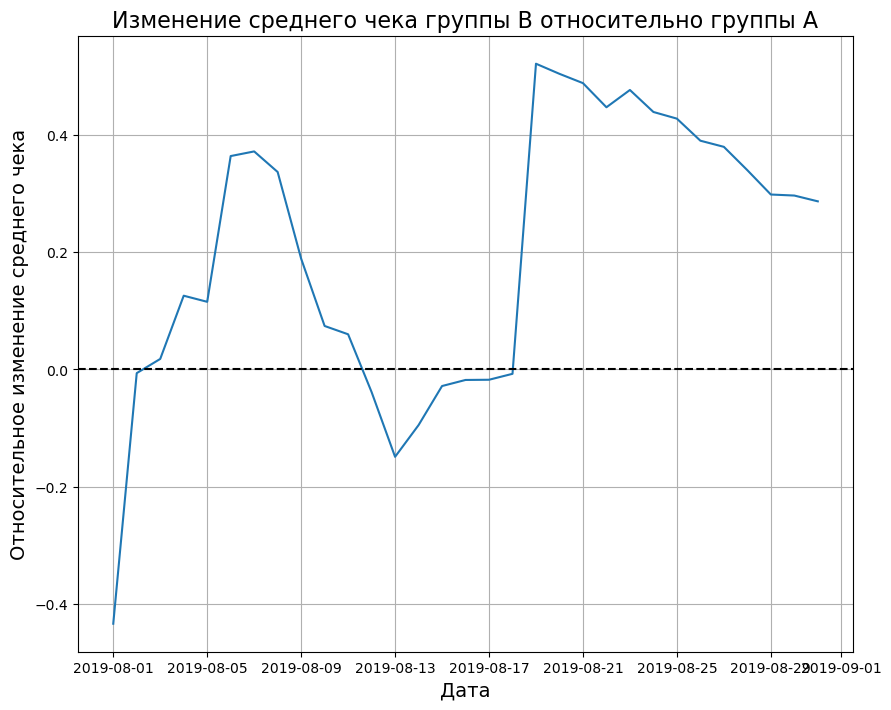

In [24]:
# Изменение среднего чека группы B относительно группы A

plt.figure(figsize=(10, 8))
plt.grid(True)
plt.xlabel('Дата', fontsize=14)
plt.ylabel('Относительное изменение среднего чека', fontsize=14)

plt.plot(mergedCumulativeRevenue['date'], 
    (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
plt.title('Изменение среднего чека группы B относительно группы A', fontsize=16)
plt.axhline(y=0, color='black', linestyle='--')

- График различия среднего чека колеблется: он-то и позволил вам найти аномалии. Сделать из этого графика определённые выводы нельзя.

Следовательно, анализируя статистически значимое различие по конверсии, по среднему чеку, графики конверсии и изменение среднего чека, можно сделать вывод, что: 
- Есть статистически значимое различие по конверсии между группами как по сырым данным, так и после фильтрации аномалий и график конверсии показывает преимущество группы В над группой А.

Таким образом, Конверсия показала преимущества группы В. Сделать выводы по графику изменения среднего чека нельзя. Но вот относительный прирост группы В по среднему чеку с 2019-08-19 по 2019-09-01 (за 12 дней) упало с 0,5 до 0,3. Возможно, если не было бы аномальных покупок, то относительный прирост был бы отрицательным и группа В проиграла бы группе А.

**Можно остановить тест, зафиксировать победу по конверсиям группу В.**

**Общий вывод.**

Я — аналитик крупного интернет-магазина. Вместе с отделом маркетинга я подготовил список гипотез для увеличения выручки.
Необходимо приоритизировать гипотезы, запустить A/B-тест и проанализировать результаты. 

**У нас имеются данные:**
- Файл гипотез `/datasets/hypothesis.csv.`
- Файл заказов `/datasets/orders.csv.`
- Файл посетителей `/datasets/visitors.csv.`

**Часть 1.** Приоретизация гипотез 

1. Приоретизация гипотез методом `ICE`. При приоретизации методом `ICE` высший балл - 16.2 набрала гипотеза индексом 8	`Запустить акцию, дающую скидку на товар в день рождения`
2. Приоретизация гипотез методом `RICE`. При приоретизации методом `RICE` высший балл - 112 набрала гипотеза индексом 7	`Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок`

**Часть 2.** Анализ А/Б теста.

1. Обработка данных. График кумулятивной выручки по группам показывает, что выручка почти равномерно увеличивается в течение всего теста. Однако графики выручки в группе В в 2019-08-19 резко растет. Это может сигнализировать о всплесках числа заказов
2. График кумулятивного среднего чека по группам становится равномерным ближе к концу теста: установился для группы A и продолжает падать для группы B. Вначале в группе А наблюдается плавное снижение и местами резкое повышение. А в группе B в половине теста наблюдается резкий всплекс, возможно, попали крупные заказы.
3. График относительного изменения кумулятивного среднего чека группы B к группе A показывает, что в нескольких точках график различия между сегментами резко скачет вниз и верх, т.к. имеются резкие выбросы (аномалии).
4. График кумулятивного среднего количества заказов на посетителя по группам показывает, что поначалу конверсии колебались, но потом усреднились. Группа А постепенно с течением времени наблюдались снижение. Группа В, стабильно в области 0.03 
5. График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A показывает, что после начала группа В находится в преимущественном положении и установился на 0,2.
6. Точечный график количества заказов по пользователям показал, что большинство покупателей заказывали 1-2 раза. Лишь малые сделали 3 покупки.
7. Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей. 95-й: 1 и 99-й: 2. Не более 5% пользователей заказали не более 2-х раз.
8. Точечный график стоимостей заказов. Есть немного дорогих заказов. По графику можно выбрать границу аномальных заказов выше 30.000 у.е. Однако принято отсеивать от 1% до 5% наблюдений с крайними значениями.
9. Посчитайте 95-й и 99-й перцентили стоимости заказов. 95-й: 26785 у.е. и 99-й: 53904 у.е. Не более 5% пользователей заказали на стоимость не более 26785 у.е. порогом моно выбрать 30.000 у.е.
10. Статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным.

Сформулируем гипотезы.
- Нулевая Н0: различий в среднем количестве заказов между группами нет.
- Альтернативная Н1: различия в среднем между группами есть.
- Используем статистический тест - непараметрический тест Уилкоксона-Манна-Уитни, так как у меня в таблице данных имеются приличные выбросы
- Уровень статистической значимости принимаем за 0.05
- **p-value: 0.011**
- **Относительный прирост среднего числа заказов группы B: 0.160**
- Отвергаем нулевую гипотезу
11. Статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным.

Сформулируем гипотезы.
- Нулевая гипотеза: различий в среднем чеке между группами нет. 
- Альтернативная гипотеза: различия в среднем чеке между группами есть. 
- Уровень статистической значимости принимаем за 0.05
- **p-value:  0.829**
- **Относительный прирост среднего чека заказа группы B:  0.287**
- Не отвергаем нулевую гипотезу
12. Статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным.
- **Статистический критерий Манна-Уитни к полученным выборкам: 0.010**
- **Относительный прирост среднего числа заказов группы B:  0.187**
- Отвергаем нулевую гипотезу
13. Статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. 
- **Статистический критерий Манна-Уитни к полученным выборкам:  0.741**
- **Относительный прирост среднего чека заказа группы B:  -0.027**
- Не отвергаем нулевую гипотезу

**Итог.**
- Есть статистически значимое различие по конверсии между группами как по сырым данным, так и после фильтрации аномалий.
- Нет статистически значимого различия по среднему чеку между группами как по сырым данным, так и после фильтрации аномалий.
- График различия конверсии между группами сообщает, что результаты группы B лучше группы A: имеют тенденцию к росту, либо зафиксировались около среднего значения. 
- График различия среднего чека колеблется и сделать определённые выводы нельзя.

14. Примите решение по результатам теста и объясните его. Варианты решений:
- Остановить тест, зафиксировать победу одной из групп.
- Остановить тест, зафиксировать отсутствие различий между группами.
- Продолжить тест.

Конверсия показала преимущество группы В. Однако выводы о среднем чеке делать нельзя. Относительный прирост группы В по среднему чеку с 2019-08-19 по 2019-09-01 снизился с 0,5 до 0,3. Без аномальных покупок прирост мог бы быть отрицательным, и группа В уступила бы группе А.

**Можно остановить тест, зафиксировать победу по конверсиям группу В.**